<a href="https://colab.research.google.com/github/YLiu95/prgm/blob/main/kmean_modified_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## original code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # initialize
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # Optimize clusters
        for _ in range(self.max_iters):
            # Assign samples to closest centroids (create clusters)
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            # check if clusters have changed
            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)

    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels

    def _create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    def _get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()


# Testing
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    X, y = make_blobs(
        centers=3, n_samples=500, n_features=2, shuffle=True, random_state=40
    )
    print(X.shape)

    clusters = len(np.unique(y))
    print(clusters)

    k = KMeans(K=clusters, max_iters=150, plot_steps=True)
    y_pred = k.predict(X)

    k.plot()

## modification

###iris data

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

import csv
with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())

In [ ]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### load iris data without using CSV

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
iris = pd.DataFrame(data.data, columns=data.feature_names)
iris['target'] = pd.Series(data.target)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


###randomly generated data

shape of X:  (777, 2)
number of clusters:  3


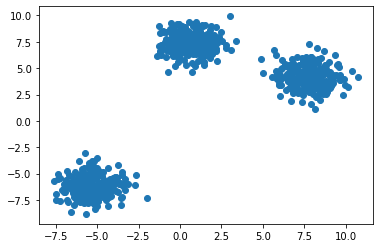

In [ ]:
# generate data for the implimentation
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(
    centers=3, n_samples=777, n_features=2, shuffle=True, random_state=95
)
print('shape of X: ', X.shape)

clusters = len(np.unique(y))
print('number of clusters: ', clusters)

# display the data
plt.scatter(X[:,0], X[:,1])

## Task 3: Create a test harness
Start preparing your implementation by first setting up a test (without having an implementation just yet!). In this way, you will follow a _test-driven development_ approach. As part of this work, you may choose to compare to a reference implementation, like the one shown in the below code example.
> Marking information: Up to 20 points: identify suitable unit tests and integration tests. Explain what coverage you expect your test suite to have.

In [ ]:
# create a reference implementation for comparesion
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= clusters)
kmeans.fit(X, y)

print('lables: ', np.unique(kmeans.labels_))
print('cluster centers:\n', kmeans.cluster_centers_)

lables:  [0 1 2]
cluster centers:
 [[ 0.64613649  7.42613444]
 [-5.39126545 -6.16570026]
 [ 7.72439802  4.25701372]]


In [ ]:
# unit test the function euclidean_distance
def test_euclidean_distance():
    eu1 = euclidean_distance(1,2)
    assert(eu1 == 1)
    eu2 = euclidean_distance(1,1)
    assert(eu2 == 0)
    eu3 = euclidean_distance(2,1)
    assert(eu3 == 1)

test_euclidean_distance()

In [ ]:
# integration test to see if the number of clusters are correct.
def test_clusters():
    k1 = KMeans(K=clusters, max_iters=77, plot_steps=False)
    assert(len(k1.clusters) == clusters)
    k2 = KMeans(K=clusters, max_iters=77, plot_steps=True)
    assert(len(k2.clusters) == clusters)
    k3 = KMeans(K=clusters, max_iters=95, plot_steps=False)
    assert(len(k3.clusters) == clusters)

test_clusters()

In [ ]:
# integration test to see if the centroids are the same 
# compare to the refernce implementation using assert function
def test_assert_centroids():
    for i in range(6):
        assert("{0:.2f}".format(np.sort(kmeans.cluster_centers_, axis=0).flatten()[i]) == 
            "{0:.2f}".format(np.sort(k.centroids, axis=0).flatten()[i]))

test_assert_centroids()

In [ ]:
# integration test to see if the centroids are the same 
# compare to the refernce implementation using assert function using unittest
import unittest

class test_Kmeans_centroids(unittest.TestCase):
    def test_unittest_centroids(self):
        k1 = KMeans(K=clusters, max_iters=77, plot_steps=False)
        for i in range(6):
            self.assertAlmostEqual(np.sort(kmeans.cluster_centers_, axis=0).flatten()[i], 
                               np.sort(k.centroids, axis=0).flatten()[i])

if __name__ == '__main__':
    # When not using Jupyter notebooks:
    # unittest.main()
    # In Jupyter notebooks use this:
    unittest.main(argv=['this-is-ignored'], exit=False)

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [ ]:
def integration_test():
    k1 = KMeans(K=clusters, max_iters=77, plot_steps=False)
    assert(len(k1.predict(X)) == 777)
    assert(len(k1.clusters) == clusters)

integration_test()

## Task 4: Implement k-means clustering in Python
You are now set to actually add the implementation. 

- Note that you are expected to **fully implement the mathematical operations** instead of using a library function such as `scikit` or `statsmodels`. 

- Your implementation may make several **assumptions about the inputs** provided to it. Make those explicit in comments. 

- Also, provide an estimate on how long execution of your algorithm will take dependent on the input values. Express this estimate as a function of the inputs, such as the number of clusters and/or the number of data points.
> Marking information: Up to 50 points: 30 points for a correctly working Python implementation, 10 points for describing limitations and assumptions of your implementation, and 10 points for a description of the complexity of your algorithm.

###Run the implementation

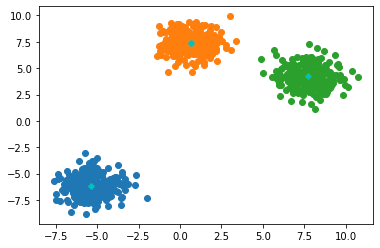

cluster centers:
 [[-5.39126545 -6.16570026]
 [ 0.64613649  7.42613444]
 [ 7.72439802  4.25701372]]
number of clusters:  3


In [ ]:
# run the implementation
if __name__ == "__main__":   
    k = KMeans(K=clusters, max_iters=77, plot_steps=False)
    y_pred = k.predict(X)

    k.plot()
    print('cluster centers:\n', k.centroids)
    print('number of clusters: ', len(k.clusters))

In [ ]:
import time

sample_size = [10**s for s in range(1, 6)]

constant_times = []

for s in sample_size:
  X, y = make_blobs(
    centers=3, n_samples=s, n_features=2, shuffle=True, random_state=95
)
  
  tic = time.clock()
  if __name__ == "__main__":   
    k = KMeans(K=clusters, max_iters=77, plot_steps=False)
    y_pred = k.predict(X)

    k.plot()
    print('cluster centers:\n', k.centroids)
    print('number of clusters: ', len(k.clusters))
  toc = time.clock()
  
  constant_times.append(toc-tic)

import pandas as pd
time = pd.DataFrame(list(zip(sample_size, constant_times)), 
                    columns=['sample size', 'time'])
time

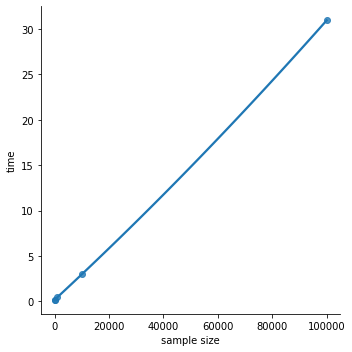

In [ ]:
import seaborn as sns
_ = sns.lmplot(x='sample size', y='time', data=time, ci=None, order=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


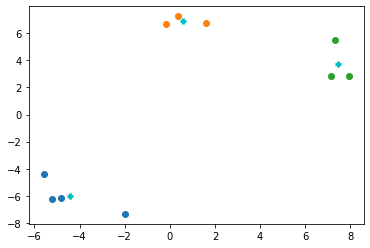

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


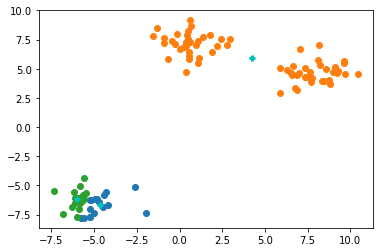

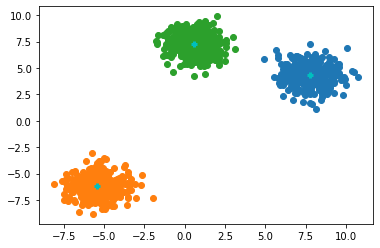

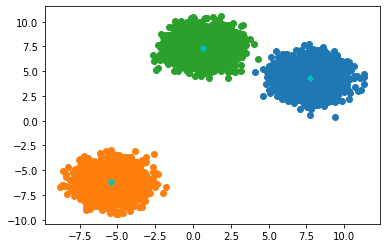

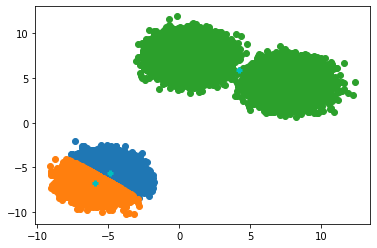

,sample size,time
0,10,0.174620
1,100,0.258332
2,1000,0.375654
3,10000,2.719110
4,100000,393.108660


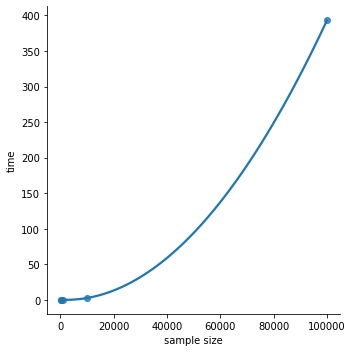

In [ ]:
import time

sample_size = [10**s for s in range(1, 6)]

constant_times = []

for s in sample_size:
  X, y = make_blobs(
    centers=3, n_samples=s, n_features=2, shuffle=True, random_state=95
)
  
  tic = time.clock()
  if __name__ == "__main__":   
    k = KMeans(K=clusters, max_iters=77, plot_steps=False)
    y_pred = k.predict(X)
    k.plot()
  toc = time.clock()
  
  constant_times.append(toc-tic)

import pandas as pd
time = pd.DataFrame(list(zip(sample_size, constant_times)), 
                    columns=['sample size', 'time'])
display(time)

import seaborn as sns
_ = sns.lmplot(x='sample size', y='time', data=time, ci=None, order=2)

##code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# set the random to ensure same results
np.random.seed(95)

# define a function for calculating the euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# implement KMeans class
class KMeans:
    def __init__(self, K, max_iters, plot_steps):
        # store the attributes
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # create empty centorids, this will become the mean feature vector for each cluser
        self.centroids = []
    
    # implement the predict method
    def predict(self, X):
        # store the data
        self.X = X
        # store the dimensions
        self.n_samples, self.n_features = X.shape

        # initialise centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        # assign the corresponding sample to the centroids
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        # optimise clusters
        for _ in range(self.max_iters):
            # assign samples to closest centroids (create / update clusters)
            self.clusters = self._create_clusters(self.centroids)
            # plot the figure after updating the clusters
            if self.plot_steps:
                self.plot()

            # calculate new centroids from the clusters
            # store the centorids for convergence checking later
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)
            # plot the fiugre after updating the centroids
            if self.plot_steps:
                self.plot()

            # check if converged
            if self._is_converged(centroids_old, self.centroids):
                break
        
        # Classify samples as the index of their clusters
        return self._get_cluster_labels(self.clusters)
        
    # define a function for getting the lables of each clusters
    def _get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        # iterate over the clusters
        for cluster_idx, cluster in enumerate(clusters):
            # iterate over the current clusters
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        #print('labels: ', np.unique(labels))
        #print('number of lables: ', len(np.unique(labels)))
        return labels

    # define a function for creating clusters
    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        # iterate over the data
        for idx, sample in enumerate(self.X):
            # get the closest centroid index
            centroid_idx = self._closest_centroid(sample, centroids)
            # append the current sample index to the closet cluster
            clusters[centroid_idx].append(idx)
        return clusters

    # define the closest centroid function
    def _closest_centroid(self, sample, centroids):
        # calculate the distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        # find the index with the minimum distence
        closest_index = np.argmin(distances)
        return closest_index
    
    # define a function for assigning mean value of clusters to centroids
    def _get_centroids(self, clusters):
        # initialise the centroids with zeros
        centroids = np.zeros((self.K, self.n_features))
        # iterate over the clusters
        for cluster_idx, cluster in enumerate(clusters):
            # calculate the cluster mean
            cluster_mean = np.mean(self.X[cluster], axis=0)
            # assign the mean to the current centroids
            centroids[cluster_idx] = cluster_mean
        return centroids
    
    # define a function for convergence checking
    def _is_converged(self, centroids_old, centroids):
        # calculate the distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        return sum(distances) == 0
    
    # define a function for visualisation
    def plot(self):
        # create the figure
        fig, ax = plt.subplots()
        # iterate over the clusters
        for i, index in enumerate(self.clusters):
            # get the current point
            point = self.X[index].T
            # scatter the points
            ax.scatter(*point)
        # plot all the centroids
        for point in self.centroids:
            ax.scatter(*point, marker="+", color="c", linewidth=3)

        plt.show()

##Optional Task 5: Add a visualisation
Identify a suitable library to depict both your inputs as well as the results of k-means clustering applied to those inputs.
> Marking information: Up to 20 _bonus_ points: if you choose to complete this _optional_ task, you may be able to recover marks lost elsewhere.